<a href="https://colab.research.google.com/github/gledsoncarvalho/bigdata-analysis-copa-do-brasil/blob/main/TCC_GLEDSON_PRIMEIRO_JOGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install jsonlines
!pip install enelvo
!pip install geobr
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 27.5 MB 1.3 MB/s 
     |████████████████████████████████| 24.1 MB 1.9 MB/s 
     |████████████████████████████████| 286 kB 34.8 MB/s 
     |████████████████████████████████| 174 kB 35.2 MB/s 
     |████████████████████████████████| 14.9 MB 55.0 MB/s 
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=5f81c967d2c4eaca03381509c2f928a7c12724abeda5a353b6052acd70aafc33
  Stored in directory: /root/.cache/pip/wheels/7d/09/45/1ad33b3ac1e05d07355a3c81fe56c89837774fdb6665574765
Successfully built emoji
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.8.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 928 kB 10.6 MB/s 
     |████████████████████████████████| 16.6 MB 65.2 MB/s 
     |████████████████████████████████| 7.8 MB 52.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 5.0 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/data')

Mounted at /content/data


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import re
import nltk
from textblob import TextBlob
import string
from io import StringIO
import json
from pandas.io.json import json_normalize
import jsonlines
import geobr
from unidecode import unidecode
# from pyspark.sql import SparkSession

# spark = SparkSession.builder.getOrCreate()

In [4]:
df = pd.DataFrame()
# jogo1_tempo1 = []
# jogo1_tempo2 = []

jogo1 = []
with jsonlines.open('/content/data/MyDrive/coleta/primeiro_jogo_primeiro_tempo.jsonl', 'r') as reader:
    for obj in reader.iter(skip_invalid=True, allow_none=True):
        jogo1.append(obj)

with jsonlines.open('/content/data/MyDrive/coleta/primeiro_jogo_primeiro_tempo2.jsonl', 'r') as reader:
    for obj in reader.iter(skip_invalid=True, allow_none=True):
        jogo1.append(obj)

with jsonlines.open('/content/data/MyDrive/coleta/primeiro_jogo_segundo_tempo.jsonl', 'r') as reader:
    for obj in reader.iter(skip_invalid=True, allow_none=True):
        jogo1.append(obj)

In [5]:
jogo1_df = pd.DataFrame(jogo1)
jogo1_df.head()

,attachments,author_id,context_annotations,conversation_id,created_at,edit_history_tweet_ids,entities,geo,id,lang,...,referenced_tweets,reply_settings,source,text,author,__twarc,matching_rules,in_reply_to_user_id,in_reply_to_user,withheld
0,"{'media_keys': ['13_1580359125044633600'], 'me...",1565980497485905921,"[{'domain': {'id': '3', 'name': 'TV Shows', 'd...",1580359474141106176,2022-10-13T00:47:14.000Z,[1580359474141106176],"{'hashtags': [{'start': 28, 'end': 31, 'tag': ...",{},1580359474141106176,pt,...,"[{'type': 'retweeted', 'id': '1580359338090192...",everyone,Twitter for Android,RT @geglobo: VAI COMEÇAR 🔥\n\n#ge #CopaDoBrasi...,"{'created_at': '2022-09-03T08:30:51.000Z', 'de...",{'url': 'https://api.twitter.com/2/tweets/sear...,"[{'id': '1580359454930997248', 'tag': 'flameng...",NaN,NaN,NaN
1,{},1213081034805239808,"[{'domain': {'id': '6', 'name': 'Sports Event'...",1580359474602078242,2022-10-13T00:47:15.000Z,[1580359474602078242],"{'annotations': [{'start': 5, 'end': 12, 'prob...",{},1580359474602078242,pt,...,NaN,everyone,Twitter for Android,se o flamengo ganhar troco meu icon por um do ...,"{'created_at': '2020-01-03T12:55:19.000Z', 'de...",{'url': 'https://api.twitter.com/2/tweets/sear...,"[{'id': '1580359454930997248', 'tag': 'flameng...",NaN,NaN,NaN
2,{},1578046916889387008,"[{'domain': {'id': '6', 'name': 'Sports Event'...",1580359473352577024,2022-10-13T00:47:14.000Z,[1580359473352577024],{},{},1580359473352577024,pt,...,NaN,everyone,Twitter for Android,hoje minha tml está cheia de flamengo e corint...,"{'created_at': '2022-10-06T15:38:13.000Z', 'de...",{'url': 'https://api.twitter.com/2/tweets/sear...,"[{'id': '1580359454930997248', 'tag': 'flameng...",NaN,NaN,NaN
3,{},1385152015806996480,"[{'domain': {'id': '6', 'name': 'Sports Event'...",1580344653215170560,2022-10-13T00:47:14.000Z,[1580359472656322561],"{'mentions': [{'start': 0, 'end': 10, 'usernam...",{},1580359472656322561,pt,...,"[{'type': 'replied_to', 'id': '158035154018264...",everyone,Twitter Web App,@mvpcastro @Pedro_P_1976 Aquele fatídico Flame...,"{'created_at': '2021-04-22T08:43:02.000Z', 'de...",{'url': 'https://api.twitter.com/2/tweets/sear...,"[{'id': '1580359454930997248', 'tag': 'flameng...",1364318535305080834,"{'created_at': '2021-02-23T20:57:57.000Z', 'de...",NaN
4,{},1079913337541009408,"[{'domain': {'id': '6', 'name': 'Sports Event'...",1580359473037996033,2022-10-13T00:47:14.000Z,[1580359473037996033],{},{},1580359473037996033,pt,...,NaN,everyone,Twitter for Android,corinthians a poucos minutos de me dar depressão,"{'created_at': '2019-01-01T01:32:58.000Z', 'de...",{'url': 'https://api.twitter.com/2/tweets/sear...,"[{'id': '1580359454930997248', 'tag': 'flameng...",NaN,NaN,NaN


In [7]:
# REMOVENDO AS COLUNAS DESNECESSÁRIAS
jogo1_df = jogo1_df.drop(columns=['attachments','conversation_id','edit_history_tweet_ids','lang' ,'public_metrics', 'referenced_tweets','reply_settings', 'source', 'author', '__twarc','matching_rules', 'in_reply_to_user_id', 'in_reply_to_user'])
# jogo1_tempo2_df = jogo1_tempo2_df.drop(columns=['attachments','conversation_id','edit_history_tweet_ids', 'id', 'lang','public_metrics', 'referenced_tweets','reply_settings', 'source', 'author', '__twarc','matching_rules', 'in_reply_to_user_id', 'in_reply_to_user'])
# a.head()
jogo1_df.head()

,author_id,context_annotations,created_at,entities,geo,id,possibly_sensitive,text,withheld
0,1565980497485905921,"[{'domain': {'id': '3', 'name': 'TV Shows', 'd...",2022-10-13T00:47:14.000Z,"{'hashtags': [{'start': 28, 'end': 31, 'tag': ...",{},1580359474141106176,False,RT @geglobo: VAI COMEÇAR 🔥\n\n#ge #CopaDoBrasi...,NaN
1,1213081034805239808,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-10-13T00:47:15.000Z,"{'annotations': [{'start': 5, 'end': 12, 'prob...",{},1580359474602078242,False,se o flamengo ganhar troco meu icon por um do ...,NaN
2,1578046916889387008,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-10-13T00:47:14.000Z,{},{},1580359473352577024,False,hoje minha tml está cheia de flamengo e corint...,NaN
3,1385152015806996480,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-10-13T00:47:14.000Z,"{'mentions': [{'start': 0, 'end': 10, 'usernam...",{},1580359472656322561,False,@mvpcastro @Pedro_P_1976 Aquele fatídico Flame...,NaN
4,1079913337541009408,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-10-13T00:47:14.000Z,{},{},1580359473037996033,False,corinthians a poucos minutos de me dar depressão,NaN


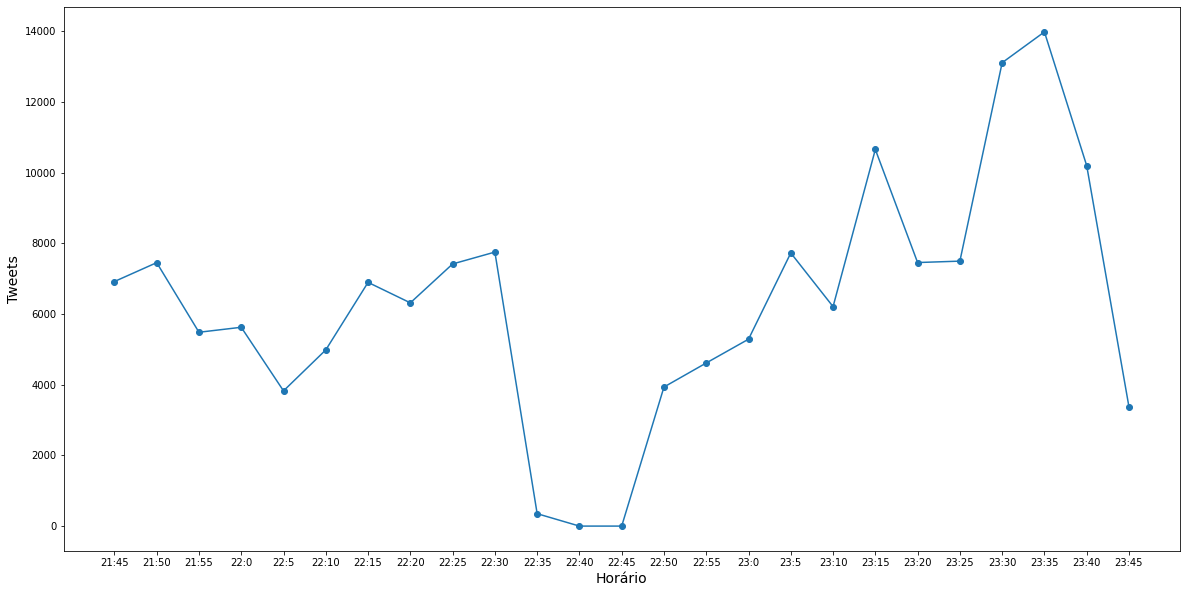

In [8]:
# PRIMEIRO JOGO

jogo1_df = jogo1_df.sort_values(by=['created_at'])
jogo1_df["created_at"] = jogo1_df["created_at"].map(pd.Timestamp)
df = jogo1_df.groupby(pd.Grouper(key='created_at', axis=0, 
                      freq='5min')).aggregate(func='count')

x = []
for i in df.index:
    i = i.astimezone(tz='America/Sao_Paulo')
    x.append(str(i.hour) + ':' + str(i.minute))
y = df.get(['author_id'])
fig = plt.figure(figsize=(20, 10))
plt.plot(x,y, marker='o')
plt.xlabel("Horário", fontsize=14)
plt.ylabel("Tweets", fontsize=14)
plt.show()


**LANCES IMPORTANTES:**

*   23:05 - defesa a queima roupa de Cássio no chute de Gabigol dentro da área
*   23:13 - bola na trave do flamengo (david luiz)
*   23:25 - bola na mão de Leo Pereira em possível pênalti



In [ ]:
df

In [ ]:
# COLETA DE LOCALIDADE DOS USUÁRIOS
cidades = []
for i in jogo1_df.get('geo'):
    if (i != {}):
        cidades.append(i['full_name'])

from collections import Counter
contador = Counter(cidades)

a = {}
for k,v in contador.most_common(10):
    a[k] = v

x = list(a.keys())
y = list(a.values())

fig = plt.figure(figsize=(20, 10))
plt.barh(x, y, color='maroon')
plt.xlabel("Tweets")
plt.ylabel("Cidades")
# plt.title("Cid")
plt.show()

[('João Gomes', 1260), ('Cássio', 872), ('CORINTHIANS', 628), ('Léo Pereira', 429), ('Cléber Machado', 288), ('Pedro', 286), ('Gabigol', 267), ('PÊNALTI', 267), ('David Luiz', 261), ('Vidal', 236)]


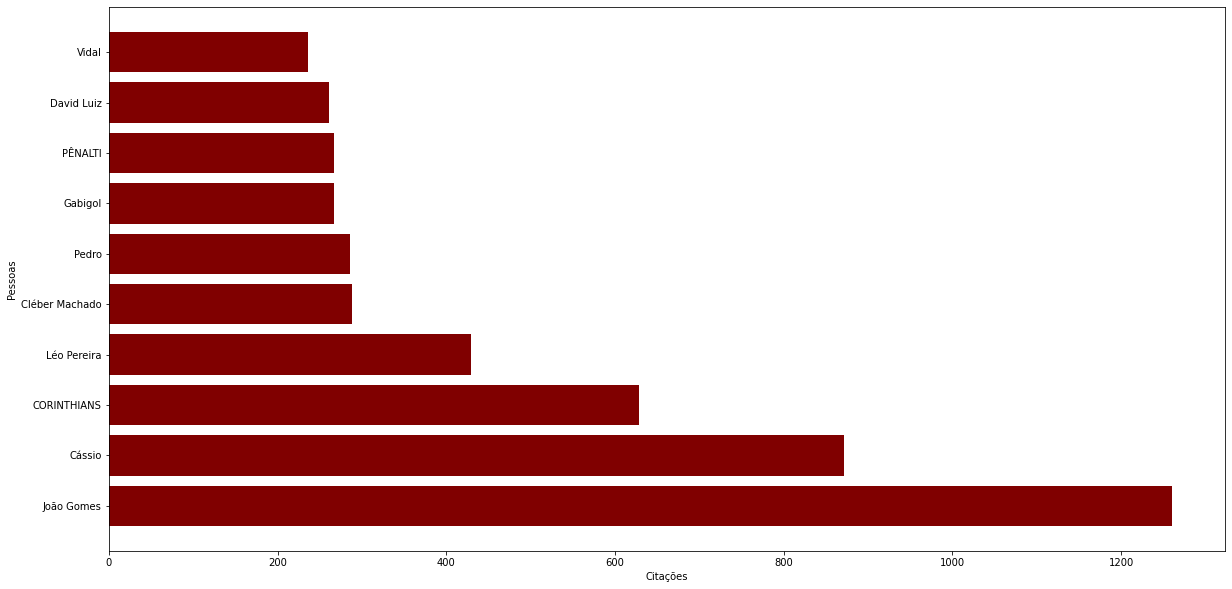

In [9]:
# PEGANDO ENTITIES - PERSON
palavras_person = []
for i in jogo1_df.get('entities'):
    if (i.get('annotations') != None):
        for j in i.get('annotations'):
            if(j.get('type') == 'Person'):
                # print(j.get('normalized_text'))
                palavras_person.append(j.get('normalized_text'))

from collections import Counter
contador = Counter(palavras_person)
# for i in contador.items():
#     print(i)
a = {}
print(contador.most_common(10))
for k,v in contador.most_common(10):
    a[k] = v

x = list(a.keys())
y = list(a.values())

fig = plt.figure(figsize=(20, 10))
plt.barh(x, y, color='maroon')
plt.xlabel("Citações")
plt.ylabel("Pessoas")
# plt.title("Cid")
plt.show()

[('Corinthians', 14569), ('Flamengo', 10139), ('flamengo', 7504), ('corinthians', 5531), ('FLAMENGO', 3469), ('CORxFLA', 1950), ('CORINTHIANS', 1384), ('VamosFlamengo', 1275), ('SCCPxFLA', 460), ('Copa do Brasil', 248)]


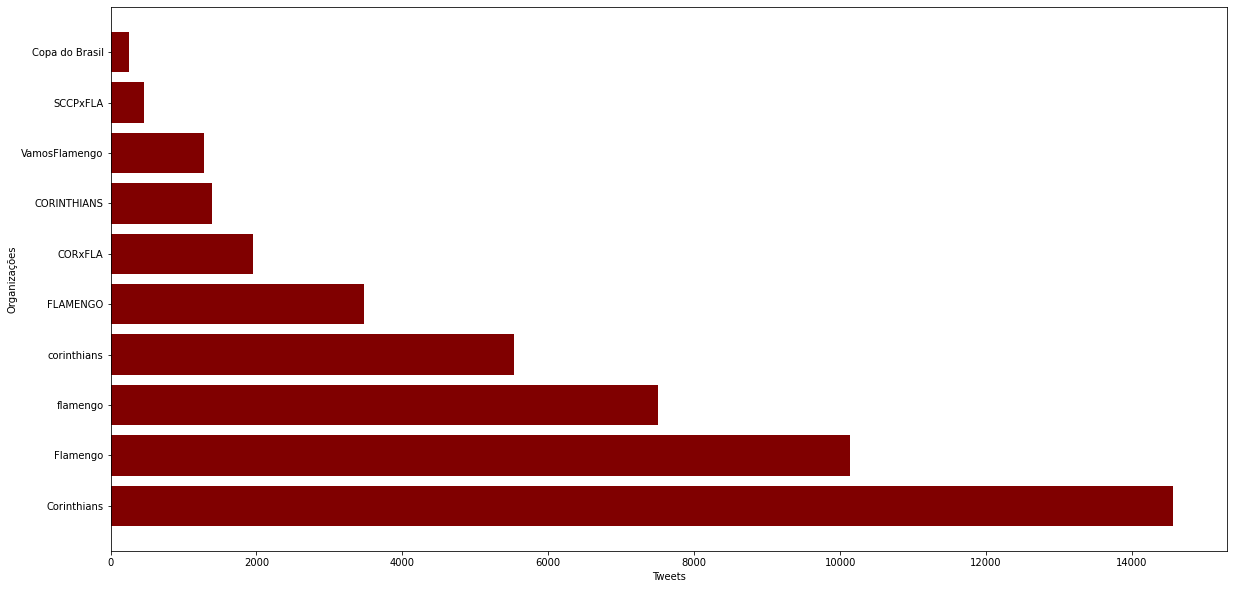

In [10]:
# PEGANDO ENTITIES - ORGANIZATION
palavras_organization = []
for i in jogo1_df.get('entities'):
    if (i.get('annotations') != None):
        for j in i.get('annotations'):
            if(j.get('type') == 'Organization'):
                # print(j.get('normalized_text'))
                palavras_organization.append(j.get('normalized_text'))

from collections import Counter
contador = Counter(palavras_organization)
# for i in contador.items():
#     print(i)
a = {}
print(contador.most_common(10))
for k,v in contador.most_common(10):
    a[k] = v

x = list(a.keys())
y = list(a.values())

fig = plt.figure(figsize=(20, 10))
plt.barh(x, y, color='maroon')
plt.xlabel("Tweets")
plt.ylabel("Organizações")
# plt.title("Cid")
plt.show()

[('Neo Química Arena', 249), ('Brasil', 247), ('ARENA', 162), ('Maracanã', 127), ('brasil', 119), ('Itaquera', 59), ('Itaquerão', 41), ('São Paulo', 37), ('BRASIL', 37), ('maracanã', 28)]


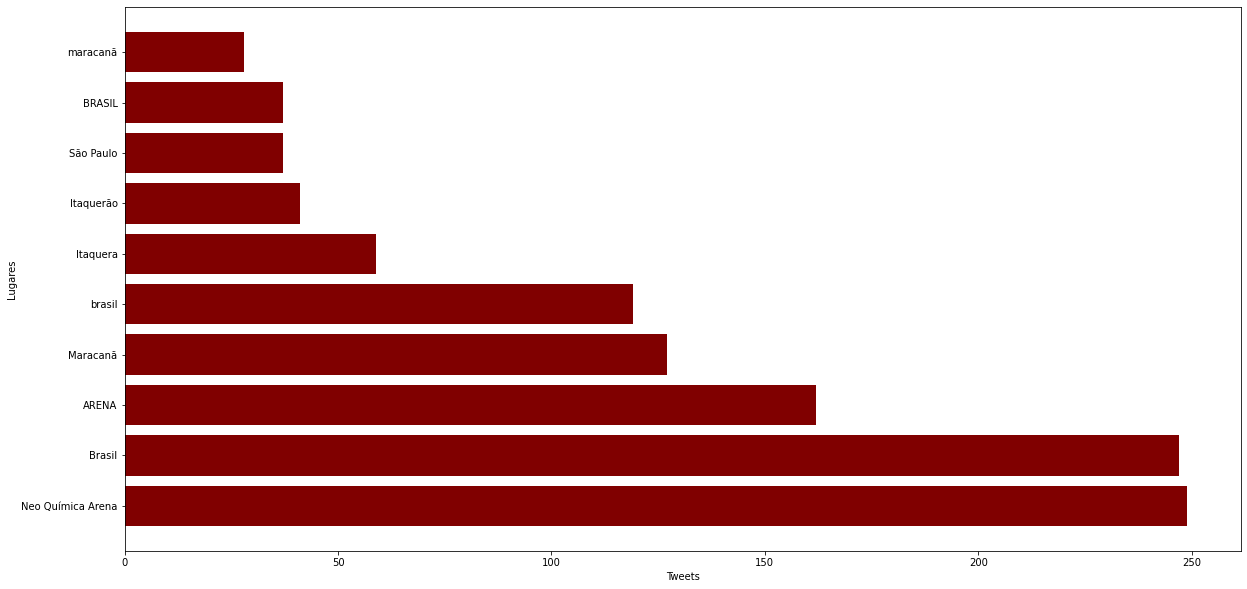

In [11]:
# PEGANDO ENTITIES - PLACE
palavras_place = []
for i in jogo1_df.get('entities'):
    if (i.get('annotations') != None):
        for j in i.get('annotations'):
            if(j.get('type') == 'Place'):
                # print(j.get('normalized_text'))
                palavras_place.append(j.get('normalized_text'))

from collections import Counter
contador = Counter(palavras_place)
# for i in contador.items():
#     print(i)
a = {}
print(contador.most_common(10))
for k,v in contador.most_common(10):
    a[k] = v

x = list(a.keys())
y = list(a.values())

fig = plt.figure(figsize=(20, 10))
plt.barh(x, y, color='maroon')
plt.xlabel("Tweets")
plt.ylabel("Lugares")
# plt.title("Cid")
plt.show()

[('CopaDoBrasil', 643), ('Deus', 611), ('CORxFLA', 408), ('deus', 282), ('DiaDeCorinthians', 237), ('DiaDeCo', 227), ('VaiCorinthians', 218), ('DEUS', 210), ('CORINTHIANS', 185), ('Copa do Brasil', 162)]


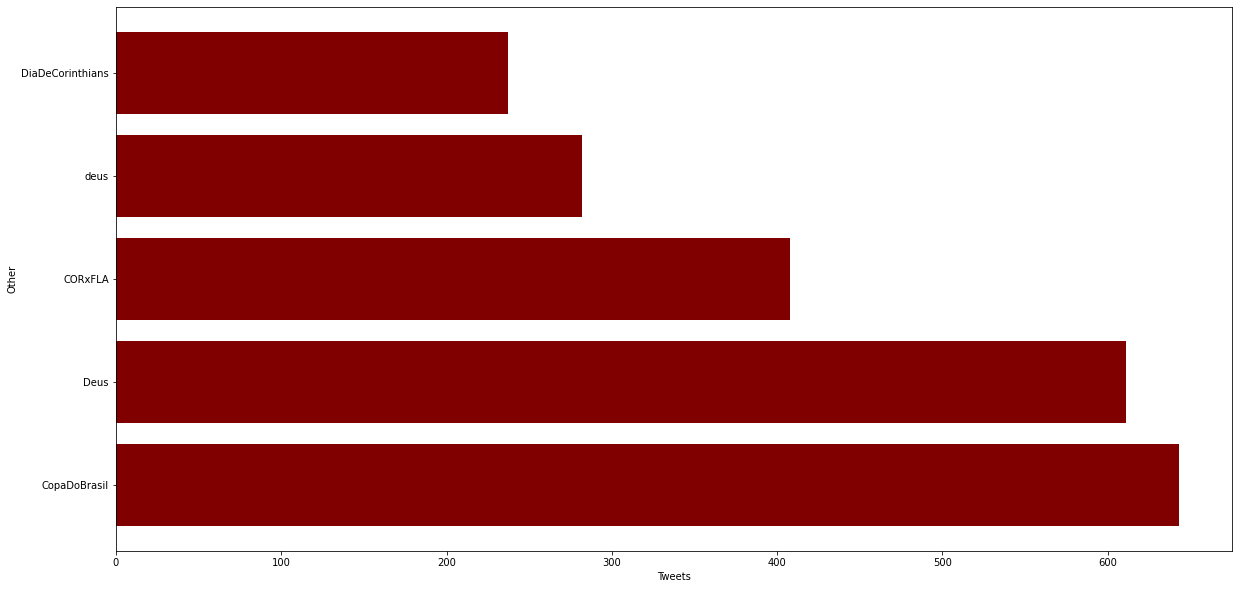

In [12]:
# PEGANDO ENTITIES - OTHERS
palavras_other = []
for i in jogo1_df.get('entities'):
    if (i.get('annotations') != None):
        for j in i.get('annotations'):
            if(j.get('type') == 'Other'):
                # print(j.get('normalized_text'))
                palavras_other.append(j.get('normalized_text'))

from collections import Counter
contador = Counter(palavras_other)
# for i in contador.items():
#     print(i)
a = {}
print(contador.most_common(10))
for k,v in contador.most_common(5):
    a[k] = v

x = list(a.keys())
y = list(a.values())

fig = plt.figure(figsize=(20, 10))
plt.barh(x, y, color='maroon')
plt.xlabel("Tweets")
plt.ylabel("Other")
# plt.title("Cid")
plt.show()

In [ ]:
def tokenize(text):
    return text.split()

class LBC:

    booster_words = [
            'muito',
            'super',
    ]

    downtoner_words = [
            'pouco',
            'apenas'
    ]

    negative_words = [
            'não',
            'nem'
    ]

    BOOST_POLARITY = 3

    def __init__(self, sentiment_lexicon_file):
        self.sentiment_lexicon = self.read_lexicon(
                self.liwc_reader, sentiment_lexicon_file)

    def read_lexicon(self, reader, lexicon_file):
        return reader(lexicon_file)

    def liwc_reader(self, lexicon_file):
        sentiment_lex = {}
        posemo = '126'
        negemo = '127'
        words_tags = open(lexicon_file, 'r').readlines()[66:]
        for entry in words_tags:
            w_tags = entry.split('\t')
            word = w_tags[0]
            if word[-1] != '*' \
                    and word not in self.booster_words \
                    and word not in self.downtoner_words \
                    and word not in self.negative_words:
                if posemo in w_tags:
                    sentiment_lex[word] = 1
                elif negemo in w_tags:
                    sentiment_lex[word] = -1
        return sentiment_lex

    def get_polarity(self, word):
        if word in self.sentiment_lexicon:
            return self.sentiment_lexicon[word]
        return 0

    def context_polarity(self, tokens, sent_word_idx):
        negation = False
        booster = False
        downtoner = False
        sentiment_word = tokens[sent_word_idx]
        word_polarity = self.get_polarity(sentiment_word)
        if len(list(set(tokens[:sent_word_idx]) &
                    set(self.negative_words))) > 0:
            negation = True
        if len(list(set(tokens[:sent_word_idx]) &
                    set(self.booster_words))) > 0:
            booster = True
        if len(list(set(tokens[:sent_word_idx]) &
                    set(self.downtoner_words))) > 0:
            downtoner = True
        if negation:
            if downtoner:
                return self.BOOST_POLARITY * word_polarity
            if booster:
                return 1 / self.BOOST_POLARITY * word_polarity
            return -1 * word_polarity
        elif booster:
            return self.BOOST_POLARITY * word_polarity
        elif downtoner:
            return 1 / self.BOOST_POLARITY * word_polarity
        return word_polarity

    def classify(self, text):
        tokens = tokenize(text)
        return sum([self.context_polarity(tokens, idx)
                    for idx in range(len(tokens))])


In [ ]:
classifier = LBC('/content/data/MyDrive/coleta/LIWC2007_Portugues_win.dic.txt')
text = 'eu não ter carro'
result = classifier.classify(text)
print(text + '\t' + str(result))

In [ ]:
# MONTANDO NUVEM DE PALAVRAS
from nltk.tokenize import word_tokenize
from enelvo.normaliser import Normaliser
nltk.download('punkt')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

def pre_processamento(texto):
  
    # seleciona apenas letras e coloca todas em minúsculo 
    letras_min =  re.findall(r'\b[A-zÀ-úü]+\b', texto.lower())

    # remove stopwords
    stop = set(stopwords)
    sem_stopwords = [w for w in letras_min if w not in stop]

    # juntando os tokens novamente em formato de texto
    texto_limpo = " ".join(sem_stopwords)

    return texto_limpo

# instanciando
norm = Normaliser(tokenizer='readable')
textos = []
sentiments = []

for i in jogo1_df.get('text'):
    text = re.sub(r'https\S+', '', i)
    text = re.sub(r'RT', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'#\S+', '', text)
    text = re.sub(r'kkk\S+', '', text)

    nova_frase = ''
    if (text != '' or text != ' '):
        try:
            nova_frase = norm.normalise(text)
            text = pre_processamento(nova_frase)
            sentiments.append(str(classifier.classify(text)))
        except:
            print('ERRO')
a = jogo1_df
a['sentiment'] = sentiments
a.head()


In [ ]:
positivo = a.query("sentiment > '0'")
neutro = a.query("sentiment == '0' or sentiment == '0.0'")
negativo = a.query("sentiment < '0'")
neutro.count()

In [ ]:
jogo1_df.query("created_at between '2022-10-13T00:47:00.000Z' and '2022-10-13T00:50:14.000Z'")

In [ ]:
positivo = positivo.sort_values(by=['created_at'])
positivo["created_at"] = positivo["created_at"].map(pd.Timestamp)
df_pos = positivo.groupby(pd.Grouper(key='created_at', axis=0, 
                      freq='5min')).aggregate(func='count')

negativo = negativo.sort_values(by=['created_at'])
negativo["created_at"] = negativo["created_at"].map(pd.Timestamp)
df_neg = negativo.groupby(pd.Grouper(key='created_at', axis=0, 
                      freq='5min')).aggregate(func='count')

neutro = neutro.sort_values(by=['created_at'])
neutro["created_at"] = neutro["created_at"].map(pd.Timestamp)
df_neu = neutro.groupby(pd.Grouper(key='created_at', axis=0, 
                      freq='5min')).aggregate(func='count')

x = []
x_neg = []
x_neu = []
for i in df_pos.index:
    i = i.astimezone(tz='America/Sao_Paulo')
    x.append(str(i.hour) + ':' + str(i.minute))

for i in df_neg.index:
    i = i.astimezone(tz='America/Sao_Paulo')
    x_neg.append(str(i.hour) + ':' + str(i.minute))

for i in df_neu.index:
    i = i.astimezone(tz='America/Sao_Paulo')
    x_neu.append(str(i.hour) + ':' + str(i.minute))

y = df_pos.get(['author_id'])
y_neg = df_neg.get(['author_id'])
y_neu = df_neu.get(['author_id'])

fig = plt.figure(figsize=(20, 10))
plt.plot(x_neg,y_neg,color='red', label='Negativo', marker='o')
plt.plot(x_neu,y_neu, color='blue', label='Neutro', marker='s')
plt.plot(x,y, color='green', label='Positivo', marker='^')
plt.xlabel("Horário", fontsize=14)
plt.ylabel("Tweets", fontsize=14)
plt.title("Sentimento x Tweets - Primeiro Jogo")
plt.legend()
plt.show()

In [19]:
# PEGANDO PESSOAS MAIS CITADAS POR PERIODO
# define a Custom aggregation 
from collections import Counter
# function for finding total
def total(series):
    df = pd.DataFrame(series)
    palavras_person = []
    for i in df.get('entities'):
        if (i.get('annotations') != None):
            for j in i.get('annotations'):
                if(j.get('type') == 'Person'):
                    # print(j.get('normalized_text'))
                    palavras_person.append(j.get('normalized_text'))


    contador = Counter(palavras_person)
    # print(len(contador.most_common(1)))
    k = 'NINGUÉM'
    v = 0
    if (len(contador.most_common(3)) > 0):
        k1,v1 = contador.most_common(3)[0]
        k2,v2 = contador.most_common(3)[1]
        k3,v3 = contador.most_common(3)[2]
        value = k1 + ',' + k2 + ',' + k3
    return value

teste = jogo1_df.sort_values(by=['created_at'])
teste["created_at"] = teste["created_at"].map(pd.Timestamp)
teste = teste.groupby(pd.Grouper(key='created_at', axis=0, 
                      freq='15min')).aggregate(func=total)
teste

/usr/local/lib/python3.8/dist-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)
/usr/local/lib/python3.8/dist-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)
/usr/local/lib/python3.8/dist-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)
/usr/lo

,entities
created_at,
2022-10-13 00:45:00+00:00,"MENGO,ROLOOOOOOOOOOOOOOOU,CORINTHIANS"
2022-10-13 01:00:00+00:00,"João Gomes,Pedro,CORINTHIANS"
2022-10-13 01:15:00+00:00,"João Gomes,CORINTHIANS,Cássio"
2022-10-13 01:30:00+00:00,"Thiago Maia,Yuri Alberto,Léo Pereira"
2022-10-13 01:45:00+00:00,"João Gomes,CORINTHIANS,Cléber Machado"
2022-10-13 02:00:00+00:00,"Cássio,João Gomes,CORINTHIANS"
2022-10-13 02:15:00+00:00,"Cássio,Renato Augusto,Cléber Machado"
2022-10-13 02:30:00+00:00,"Léo Pereira,João Gomes,PÊNALTI"
2022-10-13 02:45:00+00:00,"Léo Pereira,João Gomes,Cássio"


In [11]:
%matplotlib inline
municipios = geobr.read_municipality(code_muni='all', year=2019)
estados = geobr.read_state(code_state='all', year=2019)

/usr/local/lib/python3.8/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


In [12]:
cidades = []
for i in jogo1_df.get('geo'):
    if (i != {}):
        cidades.append(unidecode(i['name'].casefold()))

from collections import Counter
contador = Counter(cidades)
df_mun =pd.DataFrame.from_dict(contador, orient='index').reset_index()

In [16]:
len(cidades)

2787

In [17]:
municipios["name_muni"] = municipios["name_muni"].transform(lambda x: unidecode(x.casefold()))
df_mun.rename(columns = {'index':'mun', 0:'qtd'}, inplace = True)
municipios = municipios.merge(df_mun, how="left", left_on="name_muni", right_on="mun")
df_estados = municipios.groupby(['abbrev_state']).sum()
df_estados.head()

,code_muni,code_state,code_region,qtd
abbrev_state,,,,
AC,2.640772e+07,264.0,22.0,6.0
AL,2.758879e+08,2754.0,204.0,103.0
AM,8.073445e+07,806.0,62.0,47.0
AP,2.560591e+07,256.0,16.0,17.0
BA,1.216452e+09,12093.0,834.0,62.0


/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.8/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/local/lib/python3.8/dist-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


(-76.24758052684999, -26.59070825415, -35.70232894755001, 7.222992030549992)

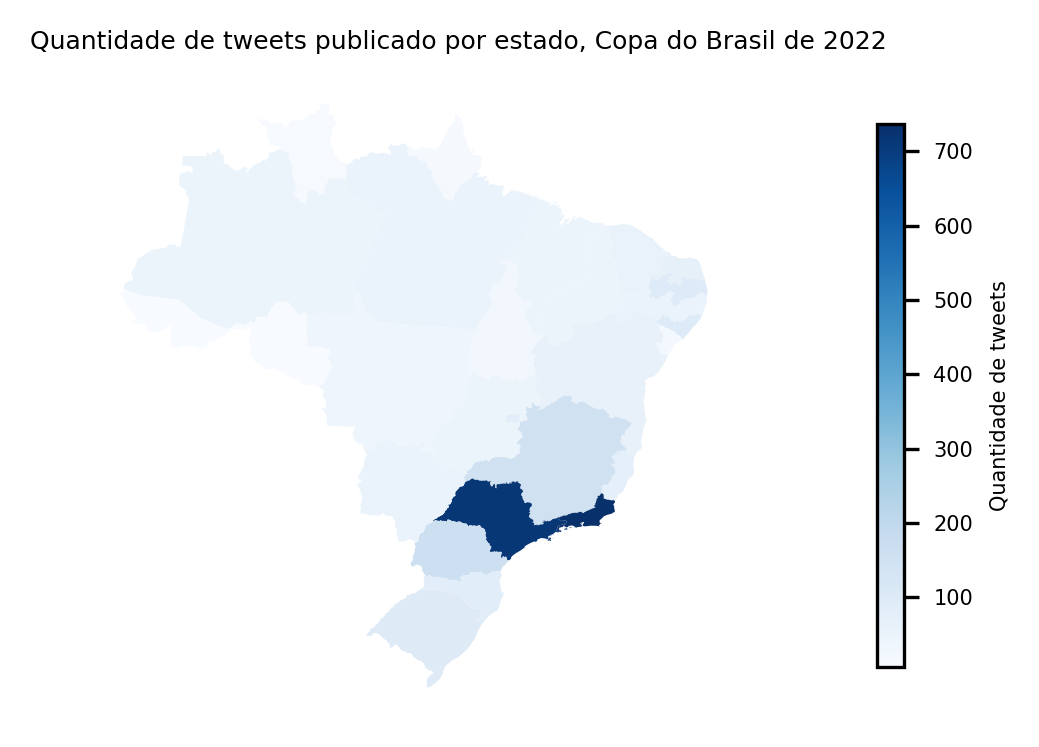

In [18]:
estados = estados.merge(df_estados, how="left", left_on="abbrev_state", right_on="abbrev_state")
plt.rcParams.update({"font.size": 5})

fig, ax = plt.subplots(figsize=(4, 4), dpi=300, edgecolor='black')

estados.plot(
    column="qtd",
    cmap="Blues",
    legend=True,
    legend_kwds={
        "label": "Quantidade de tweets",
        "orientation": "vertical",
        "shrink": 0.6,
    },
    ax=ax,
)

ax.set_title("Quantidade de tweets publicado por estado, Copa do Brasil de 2022")
ax.axis("off")